# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Eka Yulianto
- **Email:** ekaidcamp07@gmail.com
- **ID Dicoding:** eka_yulianto_X2fi

## Menentukan Pertanyaan Bisnis

- Kapan waktu dengan jumlah penyewa paling banyak dan paling sedikit ?
- Bagaimana pengaruh kondisi lingkungan dan cuaca terhadap jumlah penyewa ?
- Performa penyewaan 3 bulan terakhir ?

# Glosarium :
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	- weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Data Wrangling

### Gathering Data

In [2]:
data_day = pd.read_csv("/content/day.csv")
data_day.sort_values(by="dteday", ascending=True).head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
data_h = pd.read_csv("/content/hour.csv")
data_h.sort_values(by="dteday", ascending=True).head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
23,24,2011-01-01,1,0,1,23,0,6,0,2,0.46,0.4545,0.88,0.2985,15,24,39
22,23,2011-01-01,1,0,1,22,0,6,0,2,0.40,0.4091,0.94,0.2239,11,17,28
21,22,2011-01-01,1,0,1,21,0,6,0,2,0.40,0.4091,0.87,0.1940,3,31,34
20,21,2011-01-01,1,0,1,20,0,6,0,2,0.40,0.4091,0.87,0.2537,11,25,36


### Assessing Data

terdapat kesalahan tipe data yaitu pada data day, kolom `dteday` seharusnya bertipe `datetime` bukan `object`

In [4]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


terdapat kesalahan tipe data yaitu pada data hours kolom `dteday` seharusnya bertipe `datetime` bukan `object`

In [5]:
data_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
data_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
data_h.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
data_day.describe().style.background_gradient(cmap='inferno')

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
data_h.describe().style.background_gradient(cmap='inferno')

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.000000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.029500,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.500000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.500000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
print(f"duplicated data day : {data_day.duplicated().sum()}")
print(f"duplicated data hours : {data_h.duplicated().sum()}")

duplicated data day : 0
duplicated data hours : 0


### Cleaning Data

mengganti tipe data `dteday` ke datetime

In [11]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
data_h['dteday'] = pd.to_datetime(data_h['dteday'])
data_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
data_day.groupby(by="season").agg({
    "instant":"nunique",
    "registered" : ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
})

instant registered                          casual             \
       nunique        sum  min   max         mean     sum  min   max   
season                                                                 
1          181     410726  416  5315  2269.204420   60622    9  3155   
2          184     715067  674  6456  3886.233696  203522  120  3410   
3          188     835038  889  6917  4441.691489  226091  118  3160   
4          178     711831   20  6946  3999.050562  129782    2  3031   

                     
               mean  
season               
1        334.928177  
2       1106.097826  
3       1202.611702  
4        729.112360

Terlihat pada data bahwa pada season `Fall` menjadi waktu paling banyak penyewa, sedangkan pada season `springer` penyewa paling sedikit

In [14]:
print(f"jumlah penyewa saat springer season : {data_day[data_day['season'] == 1]['cnt'].sum()}")
print(f"jumlah penyewa saat summer season : {data_day[data_day['season'] == 2]['cnt'].sum()}")
print(f"jumlah penyewa saat fall season : {data_day[data_day['season'] == 3]['cnt'].sum()}")
print(f"jumlah penyewa saat winter season : {data_day[data_day['season'] == 4]['cnt'].sum()}")
pd.DataFrame({
    "Season" : [
        "Springer",
        "Summer",
        "Fall",
        "Winter"
    ],
    "Jumlah Penyewa" : [
        data_day[data_day['season'] == 1]['cnt'].sum(),
        data_day[data_day['season'] == 2]['cnt'].sum(),
        data_day[data_day['season'] == 3]['cnt'].sum(),
        data_day[data_day['season'] == 4]['cnt'].sum(),
    ]
}).head().style.background_gradient(cmap="inferno")

jumlah penyewa saat springer season : 471348
jumlah penyewa saat summer season : 918589
jumlah penyewa saat fall season : 1061129
jumlah penyewa saat winter season : 841613


,Season,Jumlah Penyewa
0,Springer,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


In [15]:
data_day.groupby(by="weathersit").instant.count()

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

In [16]:
data_h.groupby(by="workingday").instant.count()

workingday
0     5514
1    11865
Name: instant, dtype: int64

In [17]:
data_h.groupby(by="holiday").instant.count()

holiday
0    16879
1      500
Name: instant, dtype: int64

Jumlah penyewa tahun 2012 naik dibandingkan dengan tahun sebelumnya (2011) baik kategori user casual maupun registered.

In [18]:
data_day.groupby(by="yr").agg({
    "instant" : "nunique",
    "registered" : ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
})

instant registered                          casual                       
   nunique        sum  min   max         mean     sum min   max         mean
yr                                                                          
0      365     995851  416  4614  2728.358904  247252   9  3065   677.402740
1      366    1676811   20  6946  4581.450820  372765   2  3410  1018.483607

Jumlah penyewa kategori `registered` paling banyak menyewa pada rentang jam 16-19 , sedangkan kategori `casual` paling banyak menyewa pada rentang jam 11-18.

In [19]:
data_h.groupby(by="hr").agg({
    "registered" : ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
}).style.background_gradient(cmap="inferno")

Penyewa kategori `registered` paling banyak menyewa pada bulan 5-10, sedangkan `casual` paling banyak menyewa pada bulan 4-10.

In [20]:
data_day.groupby(by="mnth").agg({
    "registered" : ["sum", "min", "max", "mean"],
    "casual" : ["sum", "min", "max", "mean"],
}).style.background_gradient(cmap="inferno")

Kondisi lingkungan per-season

In [21]:
data_day.groupby(by="season").agg({
    "temp" : ["min", "max", "mean"],
    "atemp" : ["min", "max", "mean"],
    "hum" : ["min", "max", "mean"],
    "windspeed" : ["min", "max", "mean"],
})

temp                         atemp                           hum  \
             min       max      mean       min       max      mean       min   
season                                                                         
1       0.059130  0.572500  0.297748  0.079070  0.548617  0.296914  0.000000   
2       0.253043  0.808333  0.544405  0.250339  0.757579  0.520307  0.254167   
3       0.469167  0.861667  0.706309  0.242400  0.840896  0.655898  0.360000   
4       0.220833  0.657500  0.422906  0.227913  0.607975  0.415539  0.333478   

                           windspeed                      
             max      mean       min       max      mean  
season                                                    
1       0.948261  0.582903  0.045408  0.507463  0.214537  
2       0.922500  0.626948  0.065929  0.388067  0.203507  
3       0.939565  0.633482  0.064071  0.375617  0.172095  
4       0.972500  0.668719  0.022392  0.422275  0.171995

jumlah penyewaan pada saat working day lebih banyak dibanding saat weekend atau liburan. penyewa `registered` paling sering menyewa saat working day sedangkan `casual` lebih sering menyewa saat weekend/holiday.

In [22]:
data_day.groupby(by="workingday").agg({
    "registered" : ["min", "max", "mean", "sum"],
    "casual" : ["min", "max", "mean", "sum"],
    "cnt" : ["min", "max", "mean", "sum"],
}).style.background_gradient(cmap="inferno")

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan waktu dengan penyewaan paling banyak dan paling sedikit ?

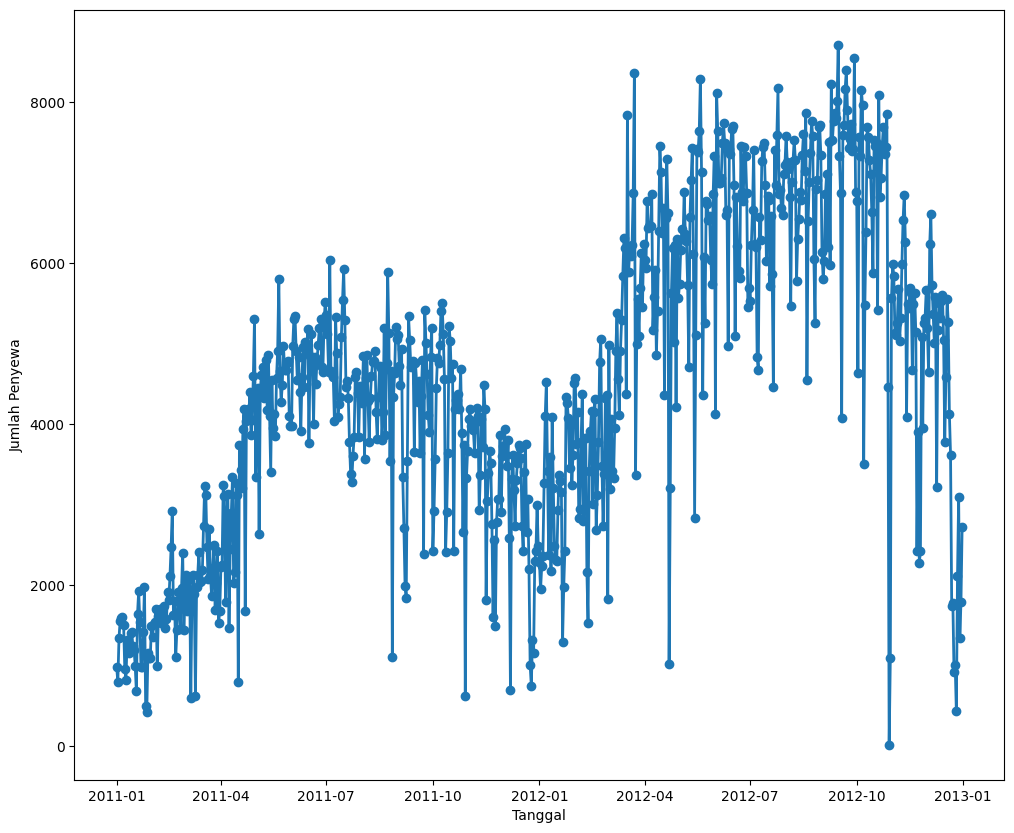

In [23]:
plt.figure(figsize=(12,10))
plt.plot(data_day['dteday'], data_day['cnt'], marker='o', linewidth=2)
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Penyewa")
plt.show()

dibawah merupakan perhitungan pada tanggal berapa paling banyak penyewa dan paling sedikit penyewa dalam rentang 2011-2012.

In [24]:
print(f"Tanggal saat penyewa paling sedikit : {data_day[data_day['cnt'] == data_day['cnt'].min()]['dteday'].values[0]} -> {data_day['cnt'].min()} penyewa")
print(f"Tanggal saat penyewa paling banyak : {data_day[data_day['cnt'] == data_day['cnt'].max()]['dteday'].values[0]} -> {data_day['cnt'].max()} penyewa")

Tanggal saat penyewa paling sedikit : 2012-10-29T00:00:00.000000000 -> 22 penyewa
Tanggal saat penyewa paling banyak : 2012-09-15T00:00:00.000000000 -> 8714 penyewa


Waktu sewa registered user terjadi paling banyak pada pukul 16-19, sedangkan casual paling banyak pada pukul 11-19, kemudian paling sedikit keduanya pada pukul 4.

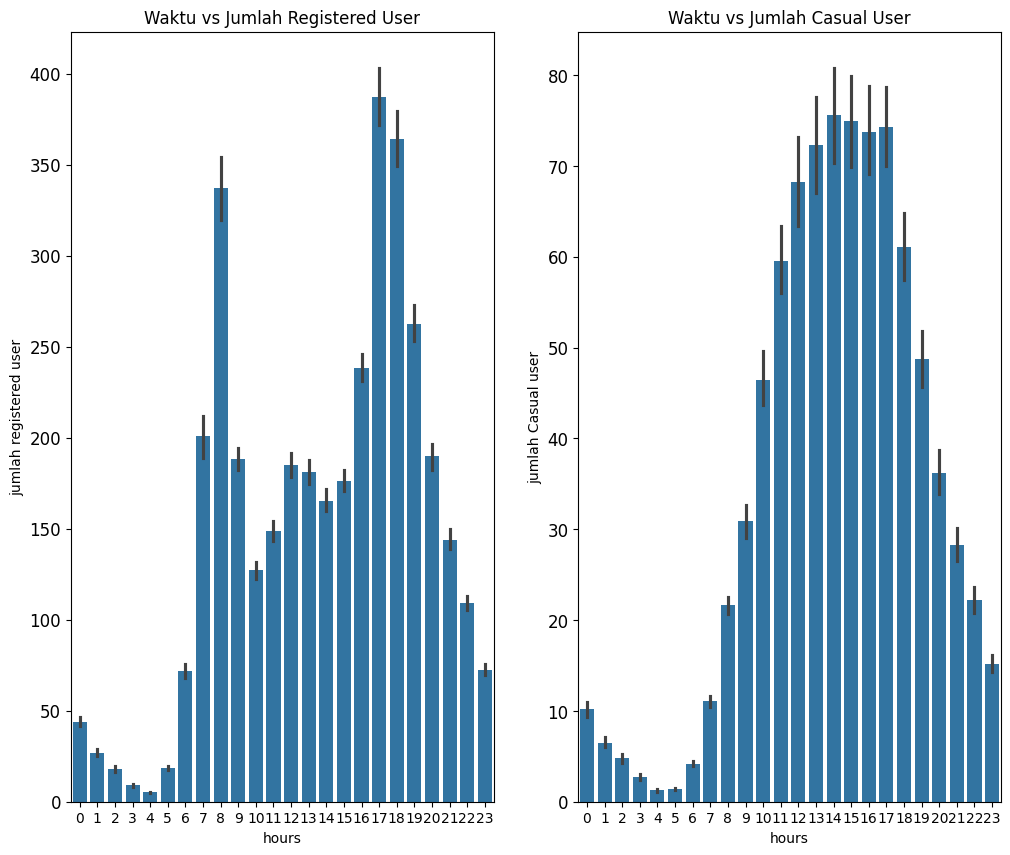

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))

sns.barplot(x="hr", y="registered", data=data_h.sort_values(by="dteday", ascending=True), ax=ax[0])
ax[0].set_xlabel("hours")
ax[0].set_ylabel("jumlah registered user")
ax[0].set_title("Waktu vs Jumlah Registered User")
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="hr", y="casual", data=data_h.sort_values(by="dteday", ascending=True), ax=ax[1])
ax[1].set_xlabel("hours")
ax[1].set_ylabel("jumlah Casual user")
ax[1].set_title("Waktu vs Jumlah Casual User")
ax[1].tick_params(axis='y', labelsize=12)



Jumlah penyewa sedikit lebih banyak saat working day dibanding saat holiday atau weekend

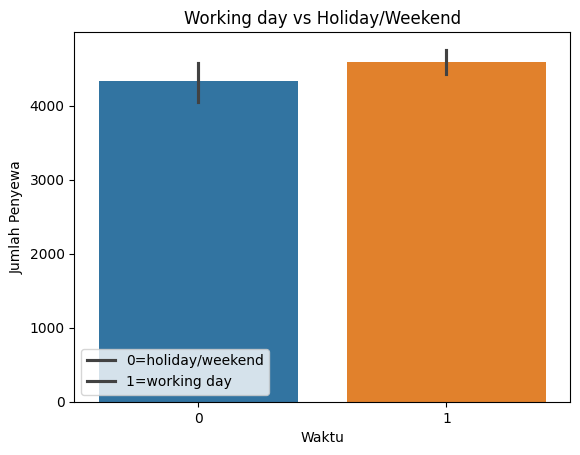

In [26]:
sns.barplot(
    x="workingday",
    y="cnt",
    hue="workingday",
    data=data_day
)
plt.xlabel("Waktu")
plt.ylabel("Jumlah Penyewa")
plt.title("Working day vs Holiday/Weekend")
plt.legend(["0=holiday/weekend", "1=working day"])
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kondisi lingkungan dan cuaca terhadap penyewaan ?

Pada season `Fall` terdapat penyewa terbanyak disusul dengan `summer`, `winter` , terakhir `springer`.

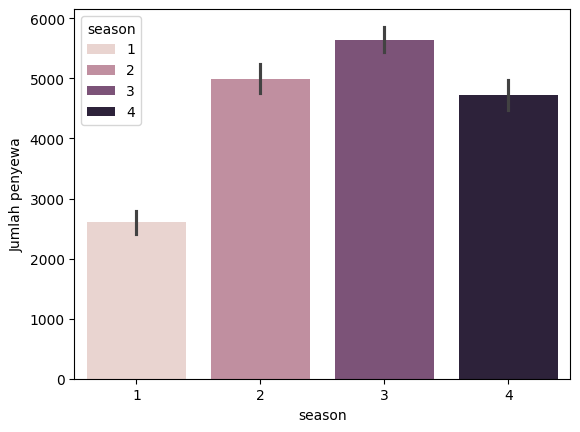

In [32]:
sns.barplot(x="season", y="cnt", data=data_day, hue="season")
plt.ylabel("Jumlah penyewa")
plt.show()

Urutan kondisi cuaca dengan jumlah penyewaan terbanyak secara berurutan yaitu : `Clear condition`, `Mist condition`, `Light snow/rain condition`.

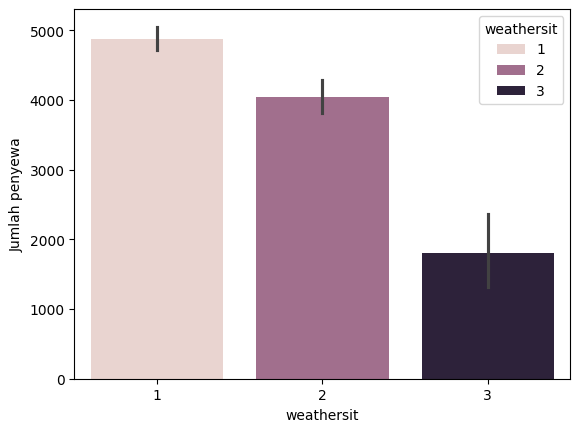

In [36]:
sns.barplot(x="weathersit", y="cnt", data=data_day, hue="weathersit")
plt.ylabel("Jumlah penyewa")
plt.show()

Berdasarkan grafik, kenaikan `temperature` dan `atemp` berbanding lurus dengan naiknya jumlah penyewa, sedangkan semakin rendah `windspeed` dan `hum` maka semakin banyak penyewa. tentunya asumsi ini harus dihitung lebih lanjut dengan algoritma regresi untuk kepastian nilainya.

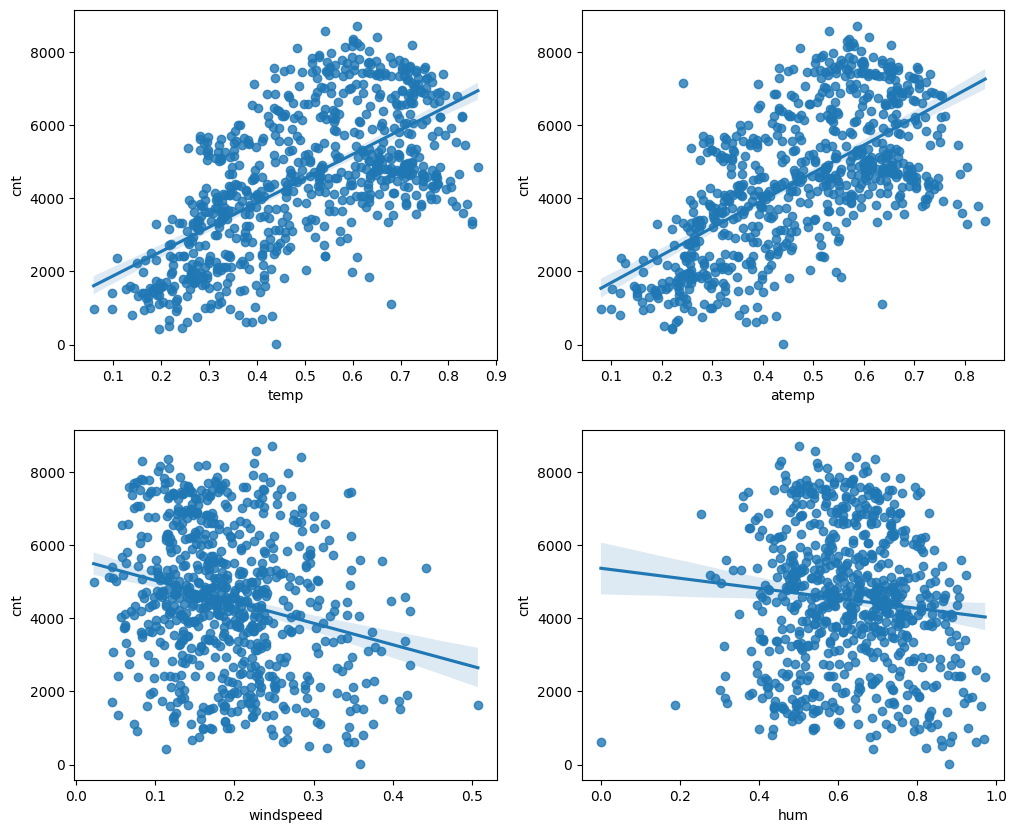

In [31]:

col_env = ["temp", "atemp", "windspeed", "hum"]

plt.figure(figsize=(12,10))
for i in range(len(col_env)):
  plt.subplot(2, 2, i+1)
  sns.regplot(x=data_day[col_env[i]], y="cnt", data=data_day)


# Pertanyaan 3 : performa 3 bulan terakhir ?

Trend penyewaan 3 bulan terakhir mengalami penurunan yang signifikan.

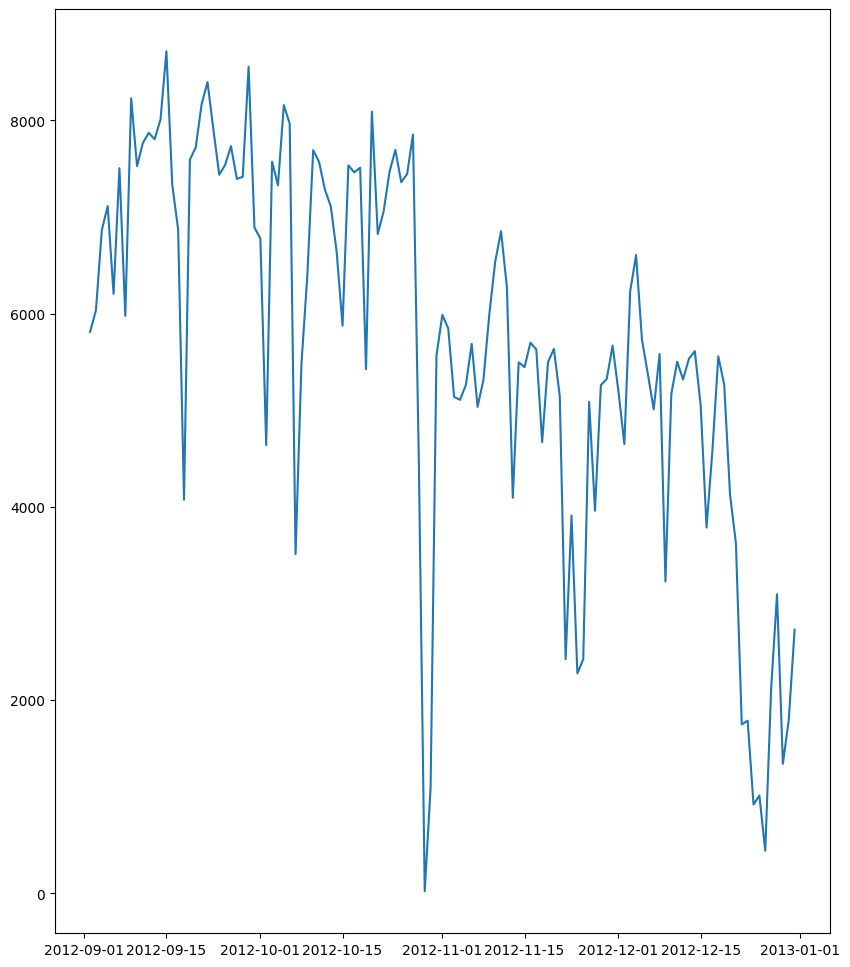

In [43]:
plt.figure(figsize=(10,12))
plt.plot( data_day[data_day['dteday'] > '2012-09-01']['dteday'], data_day[data_day['dteday'] > '2012-09-01']['cnt'])
plt.show()

## Conclusion

- Kesimpulan pada pertanyaan 1 yaitu mengenai kapan penyewaan terbanyak dan terdikit ? penyewaan terdikit terjadi pada tanggal `2012-10-29`, sedangkan terbanyak pada tanggal `2012-09-15` selain itu aktivitas penyewaan terbanyak terjadi antara pukul `11-19`.  
- Kesimpulan pada pertanyaan 2 yaitu Bagaimana pengaruh kondisi lingkungan terhadap penyewaan bike ? penyewaan paling banyak terjadi pada season `Fall` dengan weather `Clear` selain itu, jumlah penyewaan dipengaruhi oleh `temperature` dan `atemp (feeling temperature)` yang nilainya berbanding lurus dengan kenaikan penyewaan, sementara `windspeed` dan `humidity` berbanding terbalik dengan jumlah penyewaan.
- Kesimpulan pertanyaan 3 yaitu Performa penyewaan 3 bulan terakhir ? trend penyewaan sepanjang 3 bulan terakhir bersifat fluktuatif. Namun, cenderung menurun artinya jumlah penyewaan menurun